In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import json
import os
import seaborn as sns
from numpy import median
import numpy as np
%matplotlib inline

In [2]:
env='Pendulum-v1'

In [3]:
!echo $PYTHONPATH

/home/daniel/COMPER-GYM-RESULTS


In [4]:
df_comper = pd.DataFrame()
for i in range(1,6):
  path ='COMPER_DDPG/data/'+env+'/train/trial'+str(i)+'/progress.json'
  aux = pd.read_json(path,lines=True)    
  df_comper = pd.concat([df_comper,aux])
df_comper["Method"]="COMPER"
#df_comper = df_comper.set_index(["Trial"])

print(df_comper.shape)

(1250, 17)


In [5]:
df_ddpg = pd.DataFrame()
for i in range(1,6):
  path ='DPPG/data/'+env+'/train/trial'+str(i)+'/progress.json'
  aux = pd.read_json(path,lines=True)    
  df_ddpg = pd.concat([df_ddpg,aux])
df_ddpg["Method"]="DDPG"
#df_ddpg = df_ddpg.set_index(["Trial"])
print(df_ddpg.shape)

#/home/daniel/COMPER-GYM-RESULTS/DPPG/data/Ant-v4/train/trial1/progress.json

(1255, 17)


In [6]:
df_comper.head(15)

,Trial,LogCount,Task,Time,TotalItr,TMCount,RTMCount,e,Ep,EpItr,Done,EpRew,AvgEp,Avg100Ep,AvgLast50Ep,AvgLast10Ep,Method
0,1,1,Pendulum-v1,21-07-2023 21:30:43,200,0,200,0.009941,1,201,True,-1578.924133,-1578.924133,-1578.924133,-1578.924133,-1578.924133,COMPER
1,1,2,Pendulum-v1,21-07-2023 21:36:18,400,0,400,0.019882,2,201,True,-1622.751658,-1600.837896,-1600.837896,-1600.837896,-1600.837896,COMPER
2,1,3,Pendulum-v1,21-07-2023 21:41:59,600,0,600,0.029822,3,201,True,-1612.071730,-1604.582507,-1604.582507,-1604.582507,-1604.582507,COMPER
3,1,4,Pendulum-v1,21-07-2023 21:47:39,800,0,798,0.039763,4,201,True,-1647.440217,-1615.296935,-1615.296935,-1615.296935,-1615.296935,COMPER
4,1,5,Pendulum-v1,21-07-2023 21:53:19,1000,0,997,0.049704,5,201,True,-1750.445393,-1642.326626,-1642.326626,-1642.326626,-1642.326626,COMPER
5,1,6,Pendulum-v1,21-07-2023 21:59:00,1200,0,1197,0.059645,6,201,True,-1451.393555,-1610.504448,-1610.504448,-1610.504448,-1610.504448,COMPER
6,1,7,Pendulum-v1,21-07-2023 22:04:38,1400,0,1397,0.069586,7,201,True,-1749.683782,-1630.387210,-1630.387210,-1630.387210,-1630.387210,COMPER
7,1,8,Pendulum-v1,21-07-2023 22:10:17,1600,0,1597,0.079526,8,201,True,-1622.853430,-1629.445487,-1629.445487,-1629.445487,-1629.445487,COMPER
8,1,9,Pendulum-v1,21-07-2023 22:15:57,1800,0,1797,0.089467,9,201,True,-1546.638064,-1620.244662,-1620.244662,-1620.244662,-1620.244662,COMPER
9,1,10,Pendulum-v1,21-07-2023 22:21:38,2000,0,1963,0.099408,10,201,True,-1285.598576,-1586.780054,-1586.780054,-1586.780054,-1586.780054,COMPER


In [7]:
df_ddpg.head(15)

,Trial,LogCount,Task,Time,TotalItr,TMCount,RTMCount,e,Ep,EpItr,Done,EpRew,AvgEp,Avg100Ep,AvgLast50Ep,AvgLast10Ep,Method
0,1,1,Pendulum-v1,20-07-2023 23:28:33,200,201,0,0.009941,1,201,True,-1234.773541,-1234.773541,-1234.773541,-1234.773541,-1234.773541,DDPG
1,1,2,Pendulum-v1,20-07-2023 23:28:51,400,401,0,0.019882,2,201,True,-1283.609615,-1259.191578,-1259.191578,-1259.191578,-1259.191578,DDPG
2,1,3,Pendulum-v1,20-07-2023 23:29:09,600,601,0,0.029822,3,201,True,-1286.024975,-1268.136043,-1268.136043,-1268.136043,-1268.136043,DDPG
3,1,4,Pendulum-v1,20-07-2023 23:29:27,800,801,0,0.039763,4,201,True,-1731.668697,-1384.019207,-1384.019207,-1384.019207,-1384.019207,DDPG
4,1,5,Pendulum-v1,20-07-2023 23:29:45,1000,1001,0,0.049704,5,201,True,-1581.206194,-1423.456604,-1423.456604,-1423.456604,-1423.456604,DDPG
5,1,6,Pendulum-v1,20-07-2023 23:30:03,1200,1201,0,0.059645,6,201,True,-1518.317029,-1439.266675,-1439.266675,-1439.266675,-1439.266675,DDPG
6,1,7,Pendulum-v1,20-07-2023 23:30:21,1400,1401,0,0.069586,7,201,True,-1567.306529,-1457.558083,-1457.558083,-1457.558083,-1457.558083,DDPG
7,1,8,Pendulum-v1,20-07-2023 23:30:39,1600,1601,0,0.079526,8,201,True,-1508.342003,-1463.906073,-1463.906073,-1463.906073,-1463.906073,DDPG
8,1,9,Pendulum-v1,20-07-2023 23:30:57,1800,1801,0,0.089467,9,201,True,-1369.036460,-1453.365005,-1453.365005,-1453.365005,-1453.365005,DDPG
9,1,10,Pendulum-v1,20-07-2023 23:31:15,2000,2001,0,0.099408,10,201,True,-1331.604226,-1441.188927,-1441.188927,-1441.188927,-1441.188927,DDPG


In [8]:
df=pd.concat([df_comper,df_ddpg])
df.head()

,Trial,LogCount,Task,Time,TotalItr,TMCount,RTMCount,e,Ep,EpItr,Done,EpRew,AvgEp,Avg100Ep,AvgLast50Ep,AvgLast10Ep,Method
0,1,1,Pendulum-v1,21-07-2023 21:30:43,200,0,200,0.009941,1,201,True,-1578.924133,-1578.924133,-1578.924133,-1578.924133,-1578.924133,COMPER
1,1,2,Pendulum-v1,21-07-2023 21:36:18,400,0,400,0.019882,2,201,True,-1622.751658,-1600.837896,-1600.837896,-1600.837896,-1600.837896,COMPER
2,1,3,Pendulum-v1,21-07-2023 21:41:59,600,0,600,0.029822,3,201,True,-1612.071730,-1604.582507,-1604.582507,-1604.582507,-1604.582507,COMPER
3,1,4,Pendulum-v1,21-07-2023 21:47:39,800,0,798,0.039763,4,201,True,-1647.440217,-1615.296935,-1615.296935,-1615.296935,-1615.296935,COMPER
4,1,5,Pendulum-v1,21-07-2023 21:53:19,1000,0,997,0.049704,5,201,True,-1750.445393,-1642.326626,-1642.326626,-1642.326626,-1642.326626,COMPER


In [9]:
df.tail()

,Trial,LogCount,Task,Time,TotalItr,TMCount,RTMCount,e,Ep,EpItr,Done,EpRew,AvgEp,Avg100Ep,AvgLast50Ep,AvgLast10Ep,Method
246,5,247,Pendulum-v1,21-07-2023 05:54:39,49400,38854,0,0.999,247,201,True,-127.258858,-263.635399,-144.698485,-143.456155,-113.989399,DDPG
247,5,248,Pendulum-v1,21-07-2023 05:54:59,49600,38988,0,0.999,248,201,True,-120.338916,-263.057591,-144.712176,-143.493582,-113.127479,DDPG
248,5,249,Pendulum-v1,21-07-2023 05:55:19,49800,39141,0,0.999,249,201,True,-124.999056,-262.503139,-144.670818,-139.362816,-113.406130,DDPG
249,5,250,Pendulum-v1,21-07-2023 05:55:38,50000,39319,0,0.999,250,201,True,-127.077046,-261.961434,-144.686946,-139.533935,-125.041168,DDPG
250,5,251,Pendulum-v1,21-07-2023 05:55:39,50001,39320,0,0.999,251,2,True,-5.266663,-260.938746,-144.699593,-137.195949,-113.274652,DDPG


<Axes: xlabel='TotalItr', ylabel='AvgLast10Ep'>

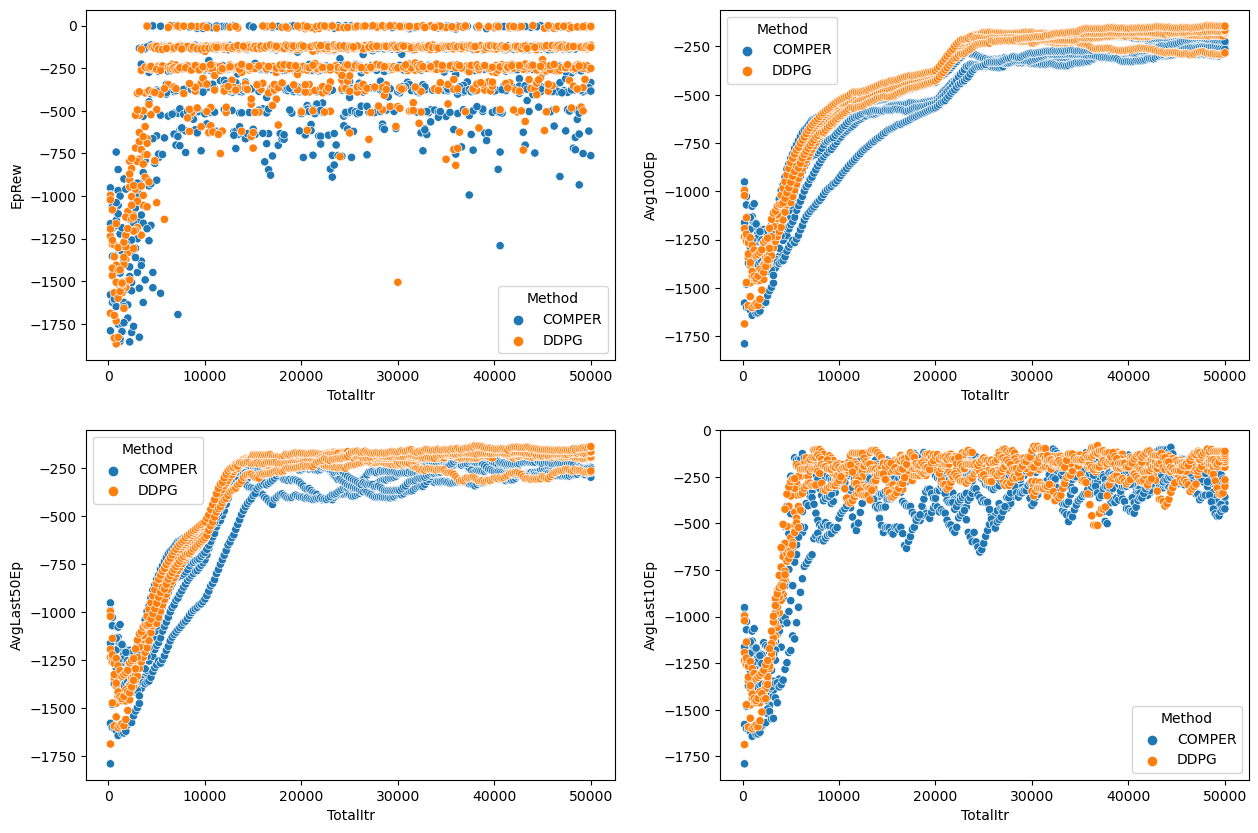

In [10]:
fig, axs = plt.subplots(nrows=2,ncols=2)
fig.set_figwidth(15)
fig.set_figheight(10)
sns.scatterplot(data=df, x="TotalItr", y="EpRew", hue="Method",ax=axs[0][0])
sns.scatterplot(data=df, x="TotalItr", y="Avg100Ep", hue="Method",ax=axs[0][1])
sns.scatterplot(data=df, x="TotalItr", y="AvgLast50Ep", hue="Method",ax=axs[1][0])
sns.scatterplot(data=df, x="TotalItr", y="AvgLast10Ep", hue="Method",ax=axs[1][1])

<Axes: xlabel='TotalItr', ylabel='AvgLast10Ep'>

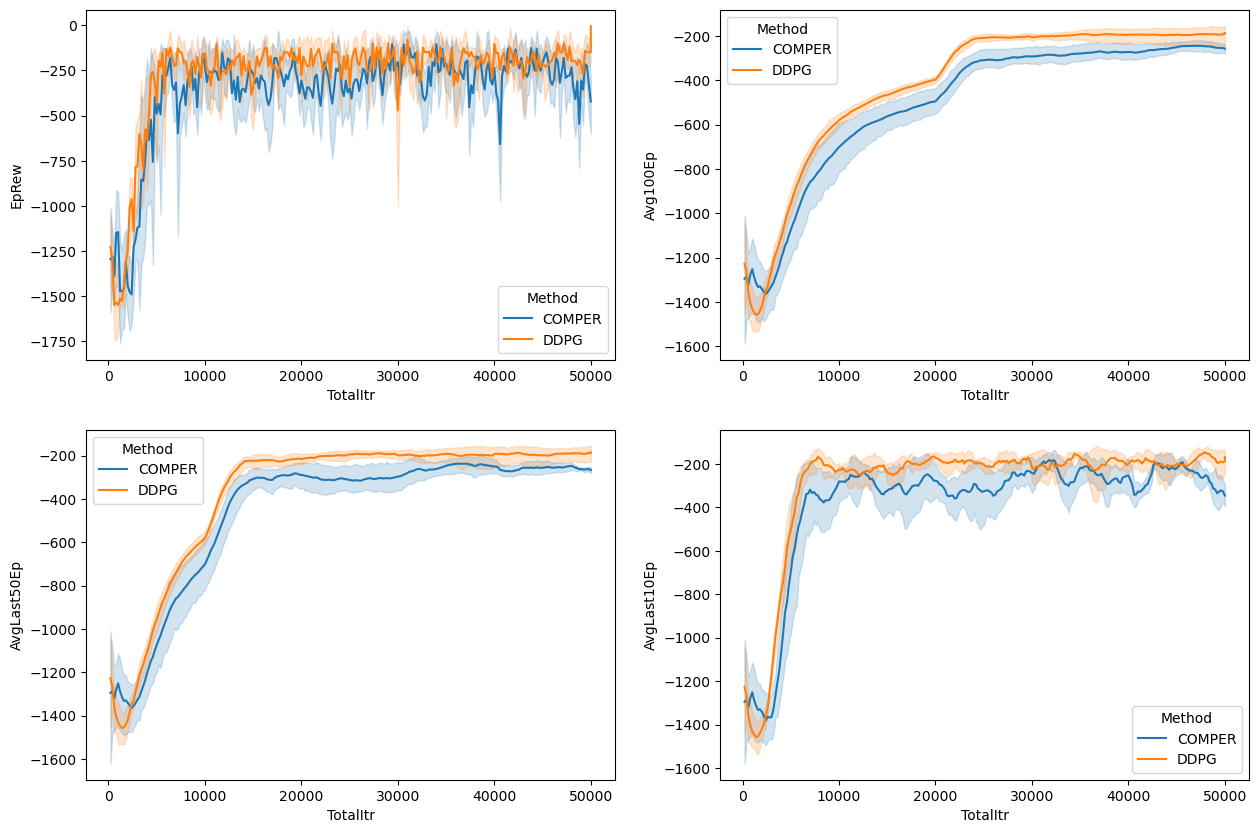

In [11]:
fig, axs = plt.subplots(nrows=2,ncols=2)
fig.set_figwidth(15)
fig.set_figheight(10)
sns.lineplot(data=df, x="TotalItr", y="EpRew",hue='Method',ax=axs[0][0])
sns.lineplot(data=df, x="TotalItr", y="Avg100Ep",hue="Method",ax=axs[0][1])
sns.lineplot(data=df, x="TotalItr", y="AvgLast50Ep",hue="Method",ax=axs[1][0])
sns.lineplot(data=df, x="TotalItr", y="AvgLast10Ep",hue="Method",ax=axs[1][1])



<Axes: xlabel='TotalItr', ylabel='AvgLast10Ep'>

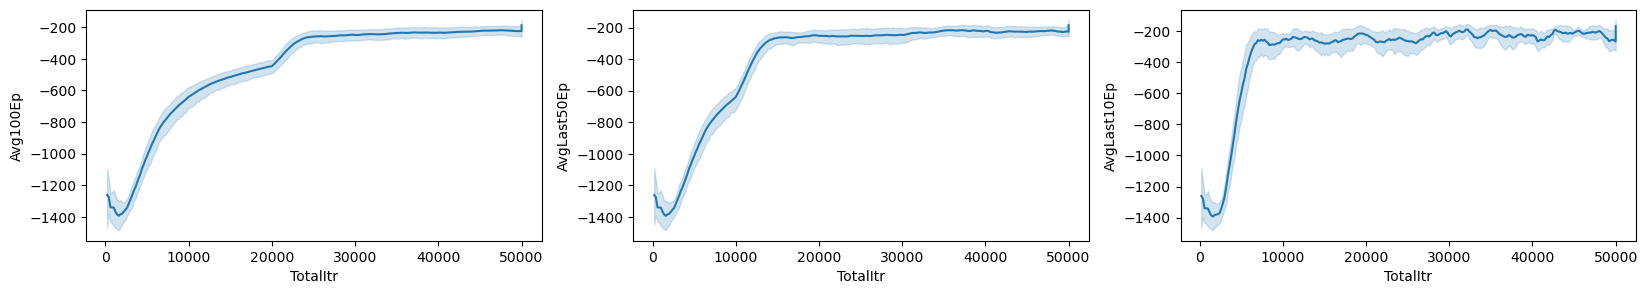

In [12]:
fig, axs = plt.subplots(ncols=3)
fig.set_figwidth(20)
fig.set_figheight(3)
sns.lineplot(data=df, x="TotalItr", y="Avg100Ep",ax=axs[0])
sns.lineplot(data=df, x="TotalItr", y="AvgLast50Ep",ax=axs[1])
sns.lineplot(data=df, x="TotalItr", y="AvgLast10Ep",ax=axs[2])

In [13]:
path ='COMPER_DDPG/data/'+env+'/eval/progress.json'
df_comper_eval = pd.read_json(path,lines=True)
df_comper_eval["Method"]="COMPER"
#df_comper_eval=df_comper_eval[df_comper_eval["Trial"]==1]
print(df_comper_eval.shape)
df_comper_eval.head()

(50, 6)


,Trial,Time,Task,Int,EvalAvgRew,Method
0,1,21-07-2023 23:46:23,Pendulum-v1,5000,-35.373224,COMPER
1,1,22-07-2023 02:07:24,Pendulum-v1,10000,-6.800706,COMPER
2,1,22-07-2023 04:29:01,Pendulum-v1,15000,-0.509993,COMPER
3,1,22-07-2023 06:50:29,Pendulum-v1,20000,-0.397945,COMPER
4,1,22-07-2023 09:12:13,Pendulum-v1,25000,-21.238918,COMPER


In [14]:
df_comper_eval.describe()

,Trial,Int,EvalAvgRew
count,50.000000,50.000000,50.000000
mean,2.400000,27500.000000,-25.184164
std,1.030158,14507.211437,19.422142
min,1.000000,5000.000000,-52.097925
25%,2.000000,15000.000000,-45.198981
50%,2.000000,27500.000000,-21.280276
75%,3.000000,40000.000000,-6.731408
max,4.000000,50000.000000,-0.093716


In [15]:
path ='DPPG/data/'+env+'/eval/progress.json'
df_ddpg_eval = pd.read_json(path,lines=True)
#df_ddpg_eval=df_ddpg_eval[df_ddpg_eval["Trial"]==1]
df_ddpg_eval["Method"]="DDPG"
print(df_ddpg_eval.shape)
df_ddpg_eval.head()

(50, 6)


,Trial,Time,Task,Int,EvalAvgRew,Method
0,1,20-07-2023 23:35:41,Pendulum-v1,5000,-15.651896,DDPG
1,1,20-07-2023 23:43:06,Pendulum-v1,10000,-40.578118,DDPG
2,1,20-07-2023 23:50:36,Pendulum-v1,15000,-37.053372,DDPG
3,1,20-07-2023 23:58:12,Pendulum-v1,20000,-0.195499,DDPG
4,1,21-07-2023 00:05:58,Pendulum-v1,25000,-12.293060,DDPG


In [16]:
df_ddpg_eval.describe()

,Trial,Int,EvalAvgRew
count,50.000000,50.000000,50.000000
mean,3.000000,27500.000000,-21.153984
std,1.428571,14507.211437,16.867812
min,1.000000,5000.000000,-50.669329
25%,2.000000,15000.000000,-36.375995
50%,3.000000,27500.000000,-17.790214
75%,4.000000,40000.000000,-5.202138
max,5.000000,50000.000000,-0.020401


In [17]:
df_eval=pd.concat([df_comper_eval,df_ddpg_eval])
df_eval.rename(columns = {'Int':'Itr'}, inplace = True)

<Axes: xlabel='Itr', ylabel='EvalAvgRew'>

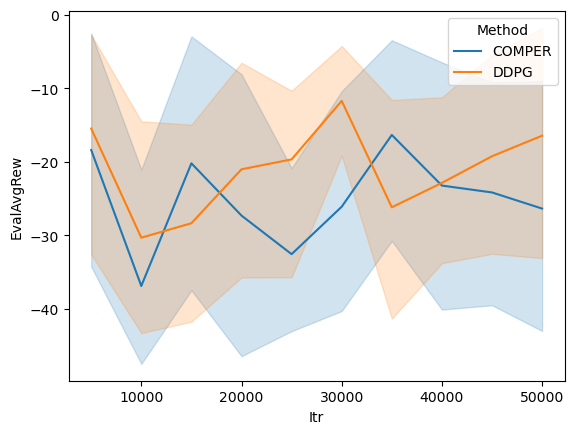

In [18]:
sns.lineplot(data=df_eval, x="Itr", y="EvalAvgRew",hue='Method')